In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [13]:
creditrisk=pd.read_csv('data/CreditRiskData.csv', encoding='latin')

In [15]:
creditrisk.head(10)

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


In [16]:
creditrisk.shape

(1000, 21)

### Data description

- GoodCredit: Whether the issued loan was a good decision or bad
- checkingstatus: Status of existing checking account.
- duration: Duration of loan in months
- history: Credit history of the applicant
- purpose: Purpose for the loan
- amount: Credit amount
- savings: Savings account/bonds
- employ: Present employment since
- installment: Installment rate in percentage of disposable income
- status: Personal status and sex
- others: Other debtors / guarantors for the applicant
- residence: Present residence since
- property: Property type of applicant
- age: Age in years
- otherplans: Other installment plans
- housing: Housing
- cards: Number of existing credits at this bank
- job: Job
- liable: Number of people being liable to provide maintenance for
- tele: Is the Telephone registered or not
- foreign: Is the applicant a foreign worker


In [21]:
# Finding how many missing values are there for each 
creditrisk.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

The data set does not have any missing values. 

### Defining the problem statement:
- Create a Predictive model which can tell weather to approve a loan application or not?
- Target Variable: GoodCredit
- Predictors: duration, history, purpose, amount, savings etc.
- GoodCredit=1 means the loan was a good decision.
- GoodCredit=0 means the loan was a bad decision.

<AxesSubplot: xlabel='GoodCredit'>

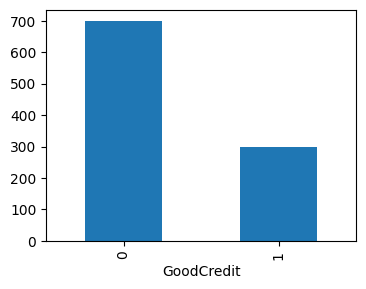

In [23]:
# Creating Bar chart as the Target variable is Categorical
GroupedData=creditrisk.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [24]:
creditrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

### Visual Exploratory Data Analysis

- Categorical variables: Bar plot
- Continuous variables: Histogram

In [25]:
creditrisk.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

In [27]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same


In [35]:
def PlotBarCharts(inputData, columnsforPlot):
    
    # Generating multiple subplots
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(columnsforPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(columnsforPlot))

    for colName, plotNumber in zip(columnsforPlot, range(len(columnsforPlot))):
        inputData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])



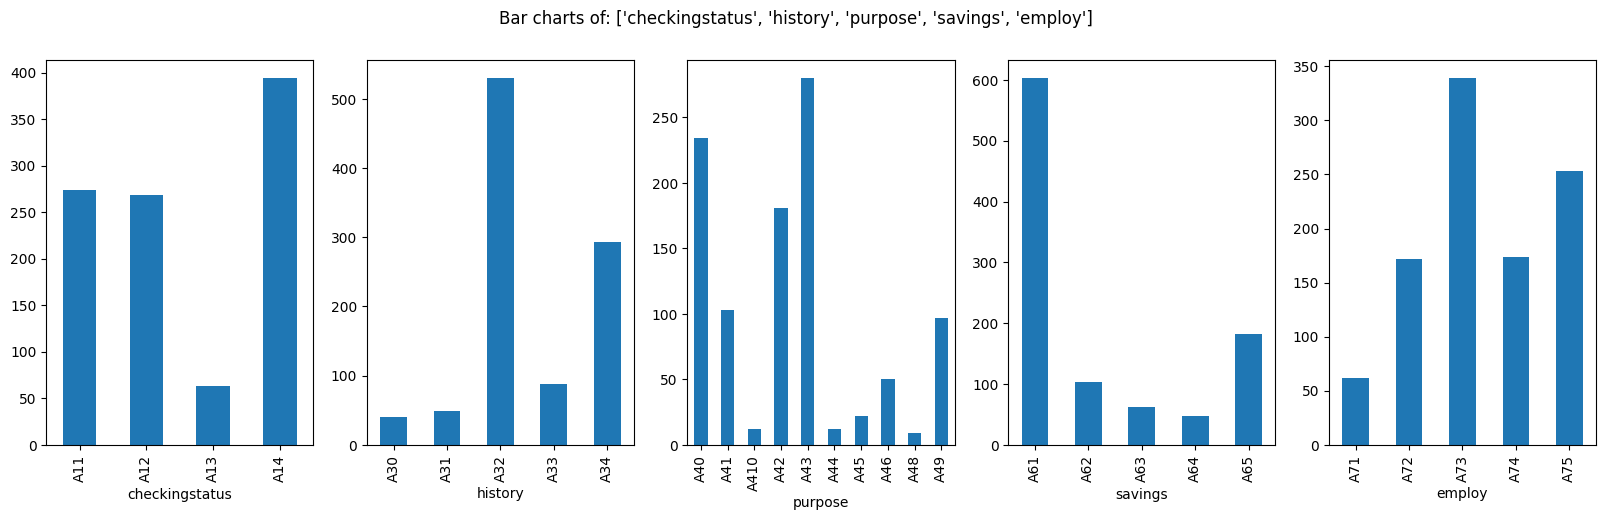

In [36]:
# Calling the function for 5 columns
PlotBarCharts(inputData=creditrisk, 
             columnsforPlot =['checkingstatus', 'history', 'purpose','savings','employ'])

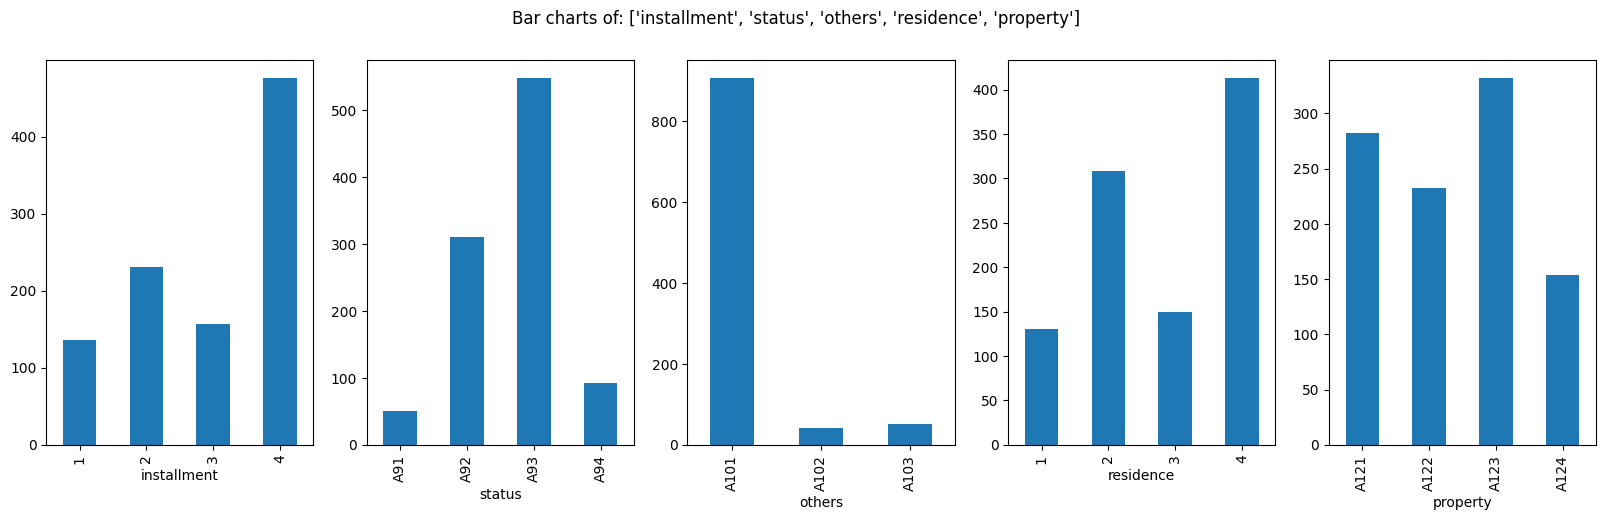

In [37]:
# Calling the function for 5 columns
PlotBarCharts(inputData=creditrisk, 
              columnsforPlot=['installment', 'status', 'others','residence', 'property'])


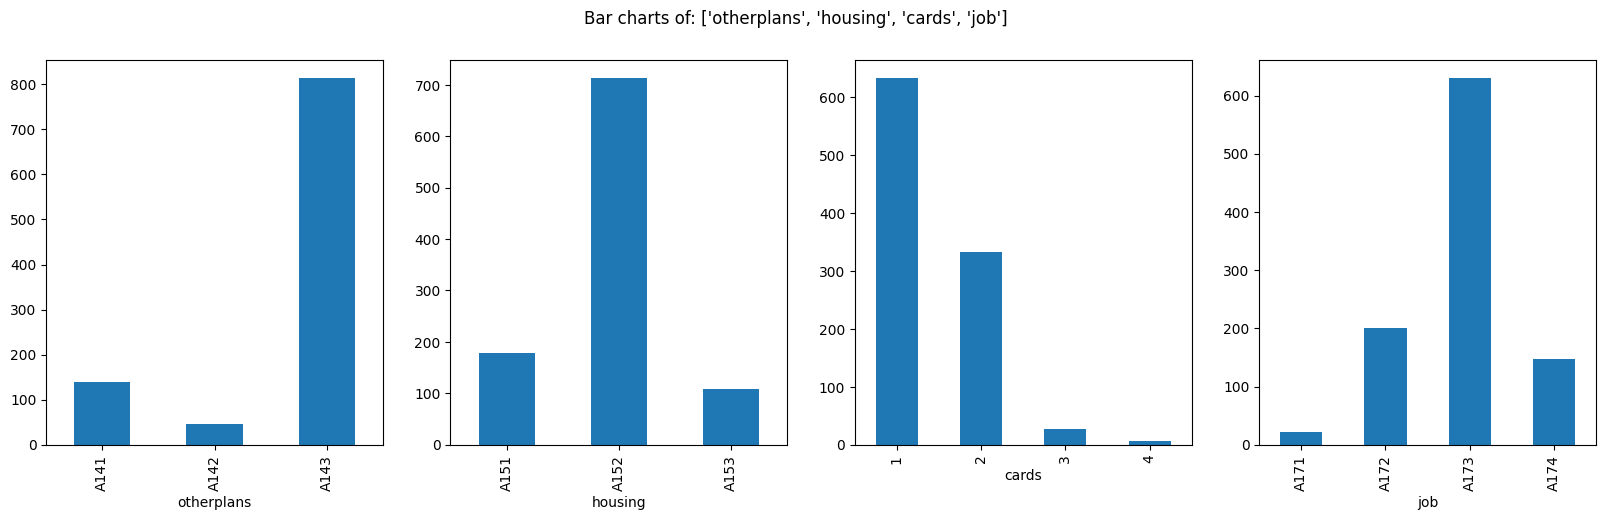

In [39]:
# Calling the function for 4 columns
PlotBarCharts(inputData=creditrisk, 
              columnsforPlot=['otherplans', 'housing', 'cards', 'job'])

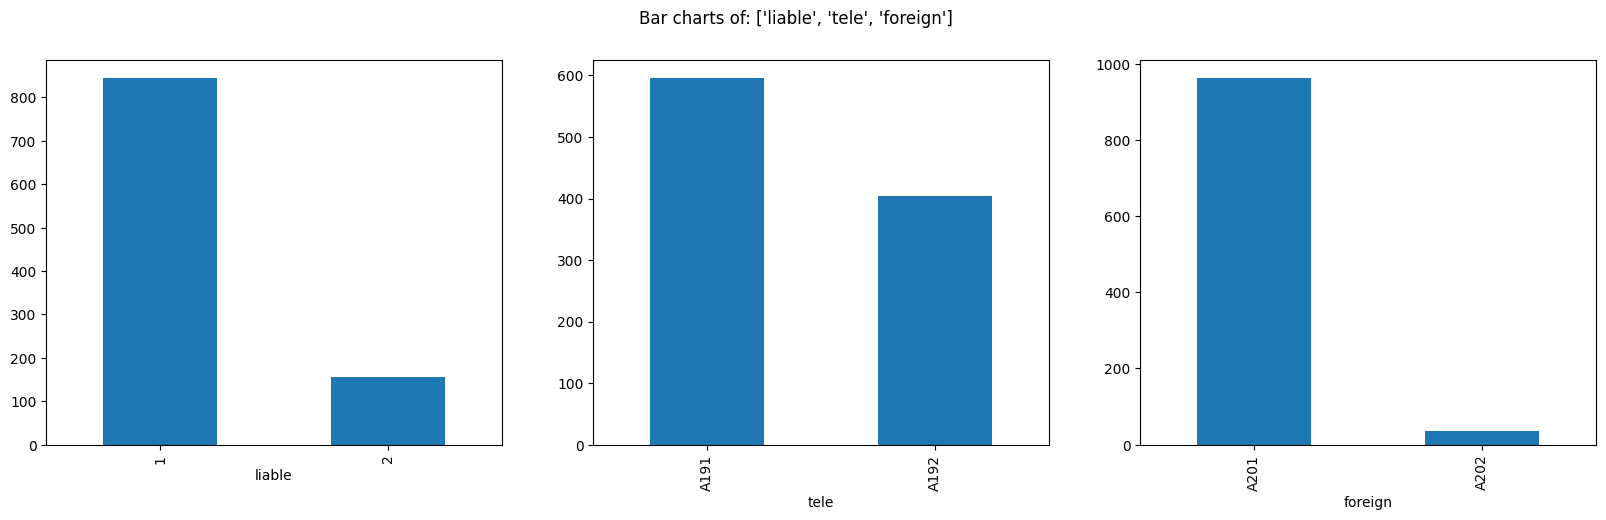

In [41]:
# Calling the function for 3 columns
PlotBarCharts(inputData=creditrisk, 
              columnsforPlot=['liable', 'tele', 'foreign'])

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

If there is a column which shows too skewed distribution like "foreign" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.
In this data, all the categorical columns except "foreign" and "others" have satisfactory distribution for machine learning.




### Visualize distribution of all the Continuous Predictor variables in the data using histograms


Based on the Basic Data Exploration, There are Three continuous predictor variables 'duration', 'amount',and 'age'.

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'amount'}>],
       [<AxesSubplot: title={'center': 'duration'}>, <AxesSubplot: >]],
      dtype=object)

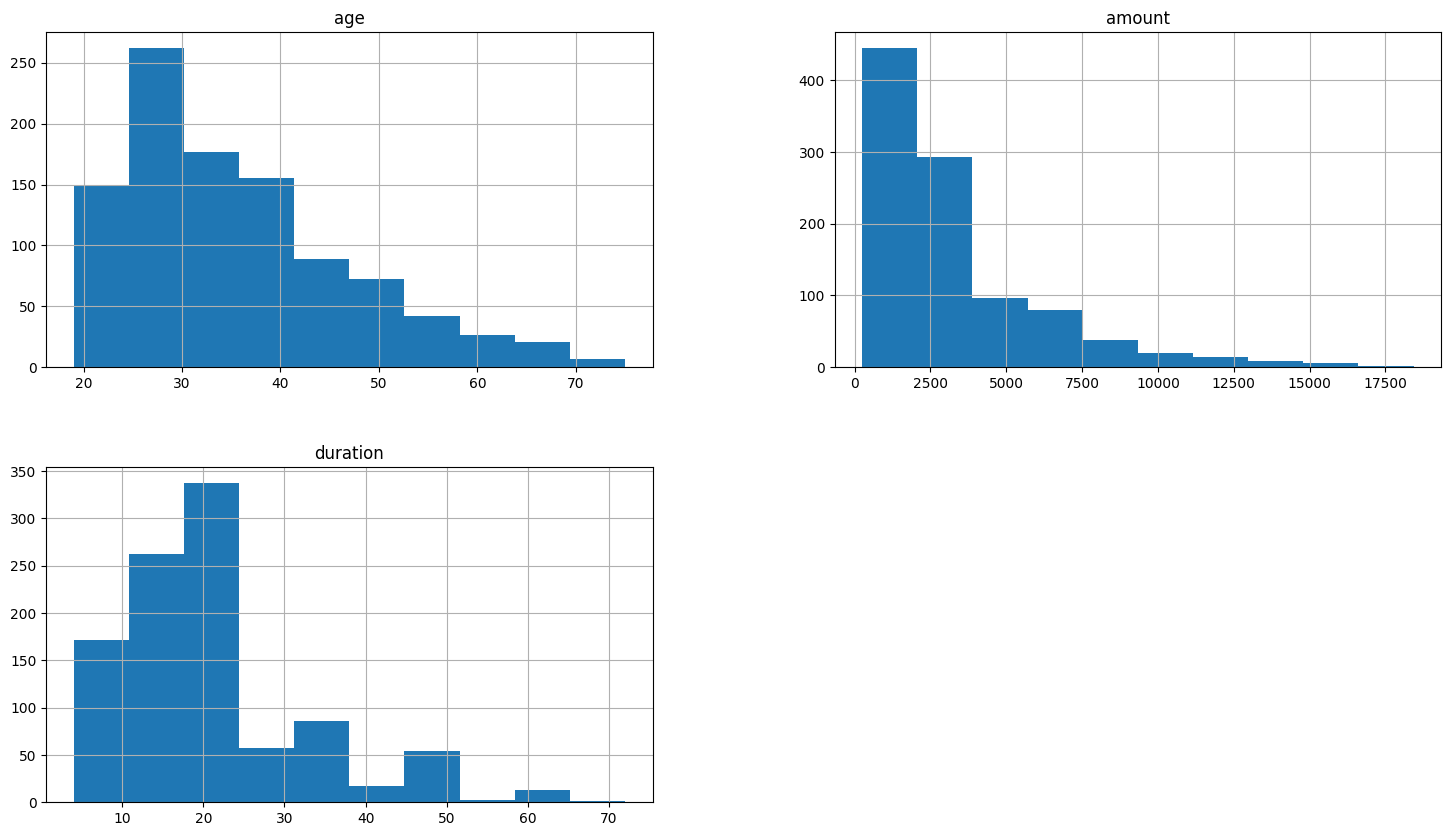

In [42]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
creditrisk.hist(['age', 'amount','duration'], figsize=(18,10))

### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.
The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "age", there are around 260 rows in data that has age between 25 to 30.
The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

### Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.
I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

Visual exploration of relationship between variables
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots


In this case study the Target variable is categorical, hence below two scenarios will be present
- Categorical Target Variable Vs Continuous Predictor
- Categorical Target Variable Vs Categorical Predictor

### Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

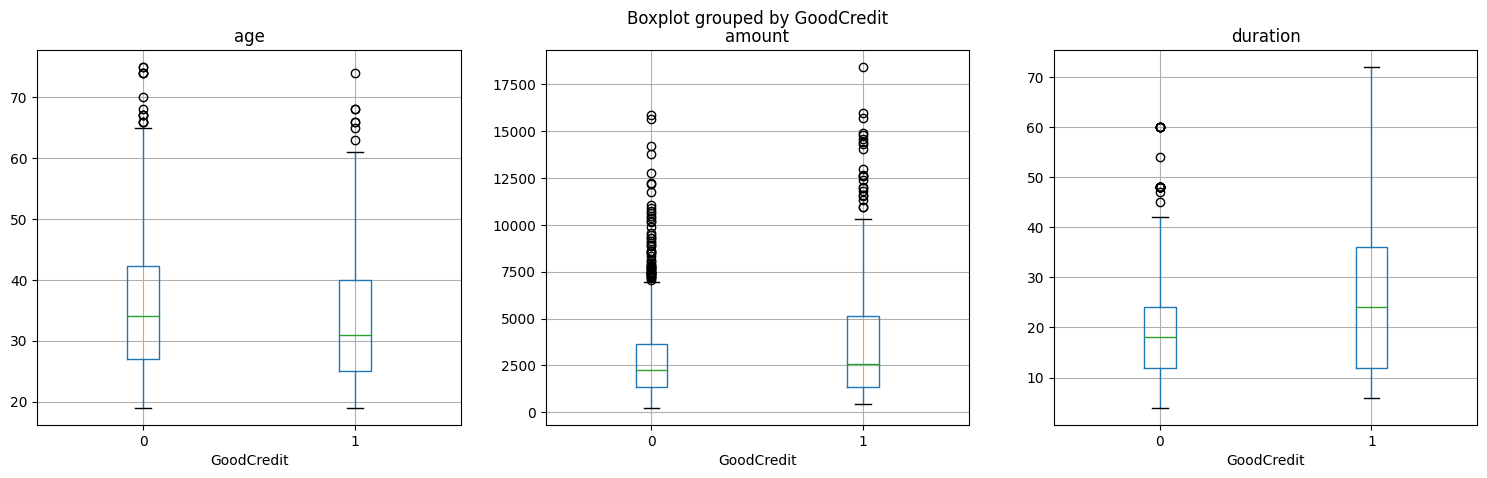

In [43]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    creditrisk.boxplot(column=PredictorCol, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.
If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.
For example, look at the first chart "age" Vs "GoodCredit". The boxes are in the similar line! It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, I cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the GoodCredit.
The other other two charts also exhibit opposite characteristics, hence "amount" and "duration" are correlated with the target variable.
We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
- ANOVA Test result: Probability of H0 being true

In [45]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inputData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inputData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [46]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inputData=creditrisk, TargetVariable='GoodCredit', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with GoodCredit | P-Value: 0.003925339398278295
amount is correlated with GoodCredit | P-Value: 8.797572373533373e-07
duration is correlated with GoodCredit | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

The results of ANOVA confirm our visual analysis using box plots above!
Notice the P-Value of "age", it is just at the boundry of the threshold. This is something we already doubted in the box plots section already.
While the other two P-Values are clearly zero, hence they are correlated without doubt.
All three columns are correlated with GoodCredit.

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [47]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=creditrisk['checkingstatus'], columns=creditrisk['GoodCredit'])
CrossTabResult

GoodCredit,0,1
checkingstatus,,
A11,139,135
A12,164,105
A13,49,14
A14,348,46


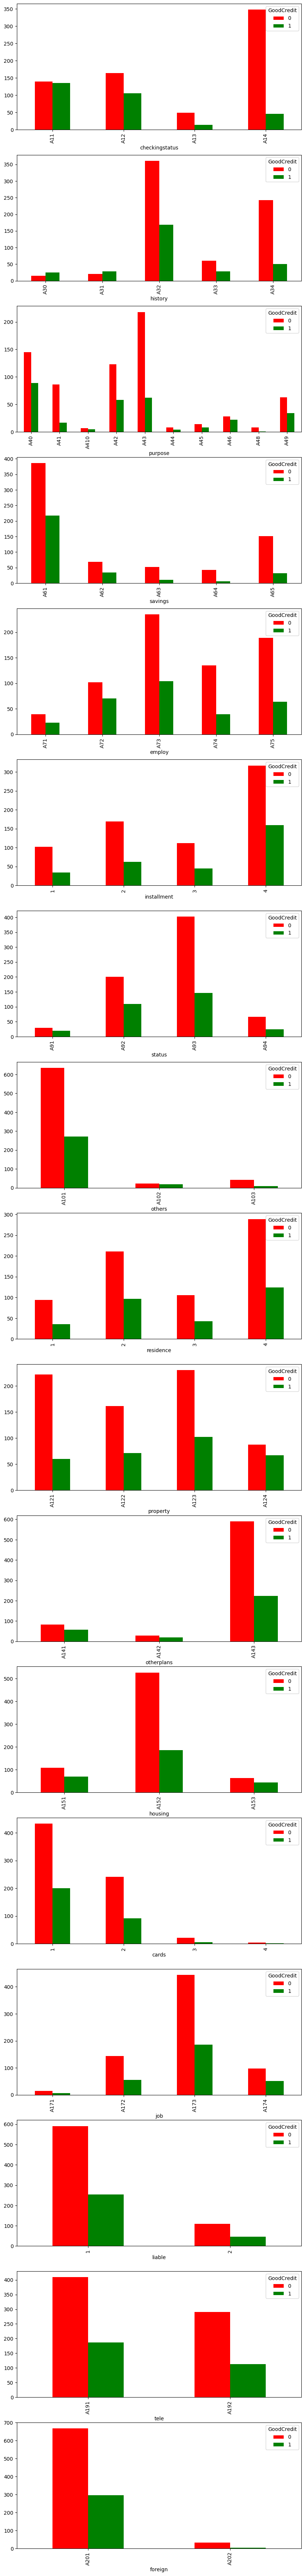

In [48]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=creditrisk[CategoricalCol], columns=creditrisk['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the "tele" Vs "GoodCredit" plot. The 0 vs 1 ratio for A191 is similar to A192, it means tele does not affect the Good/Bad Credit!. Hence, these two variables are not correlated.
On the other hand, look at the "history" vs "GoodCredit" plot. The number of Bad Credits are very high if history=A32 and A34. It means history affects the Good/Bad Credit! Hence, two columns are correlated with each other.
We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables
- Assumption(H0): The two columns are NOT related to each other
- Result of Chi-Sq Test: The Probability of H0 being True


In [50]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [51]:
CategoricalVariables=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

# Calling the function
FunctionChisq(inpData=creditrisk, 
              TargetVariable='GoodCredit',
              CategoricalVariablesList= CategoricalVariables)

checkingstatus is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
history is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
purpose is correlated with GoodCredit | P-Value: 0.00011574910079691586
savings is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
employ is correlated with GoodCredit | P-Value: 0.0010454523491402541
installment is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
status is correlated with GoodCredit | P-Value: 0.02223800546926877
others is correlated with GoodCredit | P-Value: 0.036055954027247226
residence is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
property is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
otherplans is correlated with GoodCredit | P-Value: 0.0016293178186473534
housing is correlated with GoodCredit | P-Value: 0.00011167465374597684
cards is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
job is NOT correlated with GoodCredit | P-Value: 0.59658159

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning
'checkingstatus', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'foreign'